# Exploring taxonomic incoherence of GTDB

In [14]:
import sourmash
from sourmash.lca import lca_utils
from collections import defaultdict, Counter
import math
import pandas as pd

In [2]:
idx = sourmash.load_file_as_index('gtdb-rs207.genomic.k31.sqldb')

In [3]:
idx

In [78]:
print(len(idx))

317542


In [33]:
def calc_entropy(lineages, *, rank='species'):
    cnt = Counter()
    for lin in lineages:
        while lin[-1].rank != rank:
            lin = lin[:-1]
        cnt[lin] += 1
        
    total = sum(cnt.values())
    H = 0
    for v in cnt.values():
        p = v / total
        H -= p * math.log(p, 2)
        
    return H

In [21]:
assignments = {}

xx = []

for n, hashval in enumerate(idx.hashvals):
    if n % 100000 == 0:
        print('...', n)
    lineages = idx.get_lineage_assignments(hashval)
    cnt = Counter(lineages)
    #print(cnt, sum(cnt.values()))
    
    total = sum(cnt.values())
    H = 0
    for v in cnt.values():
        p = v / total
        H -= p * math.log(p, 2)
   
    xx.append(dict(hashval=hashval, H=H))

... 0
... 100000
... 200000
... 300000
... 400000
... 500000
... 600000
... 700000
... 800000
... 900000
... 1000000
... 1100000
... 1200000
... 1300000
... 1400000
... 1500000
... 1600000
... 1700000
... 1800000
... 1900000
... 2000000
... 2100000
... 2200000
... 2300000
... 2400000
... 2500000
... 2600000
... 2700000
... 2800000
... 2900000
... 3000000
... 3100000
... 3200000
... 3300000
... 3400000
... 3500000
... 3600000
... 3700000
... 3800000
... 3900000
... 4000000
... 4100000
... 4200000
... 4300000
... 4400000
... 4500000
... 4600000
... 4700000
... 4800000
... 4900000
... 5000000
... 5100000
... 5200000
... 5300000
... 5400000
... 5500000
... 5600000
... 5700000
... 5800000
... 5900000
... 6000000
... 6100000
... 6200000
... 6300000
... 6400000
... 6500000
... 6600000
... 6700000
... 6800000
... 6900000
... 7000000
... 7100000
... 7200000
... 7300000
... 7400000
... 7500000
... 7600000
... 7700000
... 7800000
... 7900000
... 8000000
... 8100000
... 8200000
... 8300000
... 840

In [35]:
species_df = pd.DataFrame(xx)


In [36]:
num_h0 = len(species_df[species_df.H == 0.0])
nonzero_df = species_df[species_df.H > 0.0]
total = len(species_df)

print(f"{num_h0} of {total} hashvals ({num_h0 / total * 100:.1f}%) are perfectly informative at species level!")

21150287 of 22792206 hashvals (92.8%) are perfectly informative at species level!


In [77]:
len(nonzero_df)

1641919

In [38]:
hashvals = set(nonzero_df.hashval)

In [39]:
len(hashvals)

1641919

In [46]:
zz = []
for n, hashval in enumerate(hashvals):
    if n % 100000 == 0:
        print('...', n)
        #if n > 0:        break
    lineages = idx.get_lineage_assignments(hashval)
    
    H = calc_entropy(lineages, rank='genus')
    
    zz.append(dict(hashval=hashval, H=H))

... 0
... 100000
... 200000
... 300000
... 400000
... 500000
... 600000
... 700000
... 800000
... 900000
... 1000000
... 1100000
... 1200000
... 1300000
... 1400000
... 1500000
... 1600000


In [50]:
genus_df = pd.DataFrame(zz)

genus_num_h0 = len(genus_df[genus_df.H == 0.0])
genus_nonzero_df = genus_df[genus_df.H > 0.0]
genus_total = len(genus_df)

print(f"{genus_num_h0} of {genus_total} hashvals ({genus_num_h0 / genus_total * 100:.1f}%) are perfectly informative at genus level!")

1262281 of 1641919 hashvals (76.9%) are perfectly informative at genus level!


In [51]:
len(genus_nonzero_df)

379638

In [52]:
1262281 + 379638

1641919

In [53]:
379638 / 22792206

0.016656483361022625

In [55]:
zz2 = []
for n, hashval in enumerate(genus_nonzero_df.hashval):
    if n % 100000 == 0:
        print('...', n)
        #if n > 0:        break
    lineages = idx.get_lineage_assignments(hashval)
    
    H = calc_entropy(lineages, rank='family')
    
    zz2.append(dict(hashval=hashval, H=H))

... 0
... 100000
... 200000
... 300000


In [59]:
family_df = pd.DataFrame(zz2)

family_num_h0 = len(family_df[family_df.H == 0.0])
family_nonzero_df = family_df[family_df.H > 0.0]
family_total = len(family_df)

print(f"{family_num_h0} of {family_total} hashvals ({family_num_h0 / family_total * 100:.1f}%) are perfectly informative at family level!")

170249 of 379638 hashvals (44.8%) are perfectly informative at family level!


In [60]:
len(family_nonzero_df)

209389

In [61]:
209389 / 22792206

0.00918686852865405

## can we look at the actual H values to figure stuff out?

H <= 1 implies that there are two or fewer taxonomic results.

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt


(array([6.8900e+03, 3.2840e+03, 3.0090e+03, 2.8280e+03, 3.2350e+03,
        3.0950e+03, 3.3750e+03, 4.7940e+03, 2.5770e+03, 6.1640e+03,
        4.7820e+03, 6.6910e+03, 1.0300e+03, 9.7620e+03, 1.5141e+04,
        2.1400e+03, 3.1497e+04, 5.4490e+03, 6.3683e+04, 1.0260e+03,
        1.2270e+03, 5.4300e+02, 1.6940e+03, 1.0400e+03, 2.7100e+03,
        7.5500e+02, 1.5220e+03, 4.5880e+03, 4.8060e+03, 4.8900e+02,
        6.3800e+02, 6.5900e+02, 7.4900e+02, 7.1200e+02, 1.3490e+03,
        4.1700e+02, 1.0020e+03, 2.7300e+02, 4.7000e+02, 2.8200e+02,
        5.3200e+02, 3.2600e+02, 1.8500e+02, 2.5200e+02, 1.6100e+02,
        2.5800e+02, 1.7600e+02, 1.2500e+02, 9.2000e+01, 1.3900e+02,
        8.9000e+01, 9.5000e+01, 8.5000e+01, 6.6000e+01, 5.6000e+01,
        5.0000e+01, 2.7000e+01, 2.9000e+01, 3.0000e+01, 2.3000e+01,
        2.7000e+01, 3.2000e+01, 2.2000e+01, 1.2000e+01, 1.3000e+01,
        1.8000e+01, 9.0000e+00, 1.1000e+01, 1.2000e+01, 8.0000e+00,
        8.0000e+00, 3.0000e+00, 3.0000e+00, 3.00

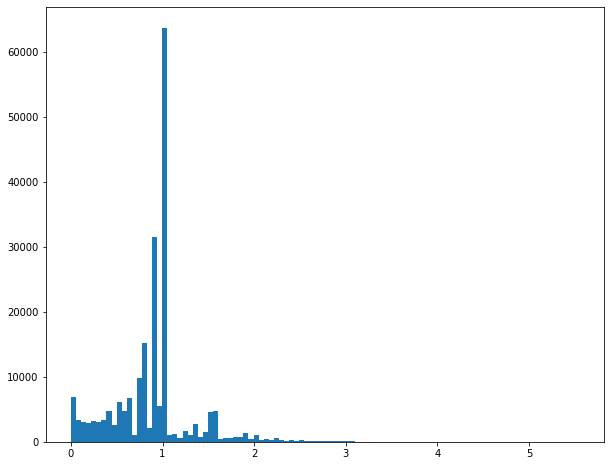

In [63]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.hist(family_nonzero_df.H, bins=100)

In [70]:
# detect perfectly balanced hashvals = split between two families.
df_H1 = family_nonzero_df[family_nonzero_df.H == 1.0]

In [69]:
hashval = next(iter(df_H1.hashval))
lineages = idx.get_lineage_assignments(hashval)
lineages

[(LineagePair(rank='superkingdom', name='d__Bacteria'),
  LineagePair(rank='phylum', name='p__Actinobacteriota'),
  LineagePair(rank='class', name='c__Thermoleophilia'),
  LineagePair(rank='order', name='o__Gaiellales'),
  LineagePair(rank='family', name='f__Gaiellaceae'),
  LineagePair(rank='genus', name='g__PALSA-600'),
  LineagePair(rank='species', name='s__PALSA-600 sp013821525')),
 (LineagePair(rank='superkingdom', name='d__Bacteria'),
  LineagePair(rank='phylum', name='p__Gemmatimonadota'),
  LineagePair(rank='class', name='c__Gemmatimonadetes'),
  LineagePair(rank='order', name='o__Gemmatimonadales'),
  LineagePair(rank='family', name='f__Gemmatimonadaceae'),
  LineagePair(rank='genus', name='g__FEN-1250'),
  LineagePair(rank='species', name='s__FEN-1250 sp013697785'))]

In [71]:
f"{209389 * 10000:g}"

'2.09389e+09'

## can we track down biggest offending genomes?

In [72]:
idx_count = Counter()
for n, hashval in enumerate(family_nonzero_df.hashval):
    if n % 10000 == 0:
        print('....', n)
    idx_count.update(idx.hashval_to_idx[hashval])


.... 0
.... 10000
.... 20000
.... 30000
.... 40000
.... 50000
.... 60000
.... 70000
.... 80000
.... 90000
.... 100000
.... 110000
.... 120000
.... 130000
.... 140000
.... 150000
.... 160000
.... 170000
.... 180000
.... 190000
.... 200000


In [75]:
idx_count.most_common()[:20]

[(161751, 451),
 (130623, 423),
 (106404, 423),
 (16340, 422),
 (102799, 422),
 (74969, 421),
 (258379, 420),
 (57968, 419),
 (246075, 419),
 (1205, 418),
 (65470, 418),
 (20605, 417),
 (184464, 416),
 (290619, 415),
 (59191, 415),
 (126080, 415),
 (255618, 415),
 (141402, 413),
 (67112, 412),
 (299076, 412)]

In [76]:
for (idx_val, count) in idx_count.most_common()[:10]:
    print(idx.idx_to_ident[idx_val])

GCA_001894475
GCF_001374035
GCF_002135965
GCF_001374135
GCF_018551555
GCF_000794885
GCF_001374095
GCF_009600645
GCF_000794905
GCF_000478465


## can we track down biggest offending genomes, mark 2

tl;dr use gather

In [80]:
print(len(family_nonzero_df))

209389


In [89]:
mh = next(iter(idx.signatures())).minhash.copy_and_clear()
print(mh)

mh.add_many(list(family_nonzero_df.hashval))
print(len(mh))

query_ss = sourmash.SourmashSignature(mh)
with open('gtdb.family_confused.sig.gz', 'wb') as fp:
    sourmash.save_signatures([query_ss], fp, compression=1)

209389
